In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from sklearn.metrics import mean_squared_error,r2_score
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import SimpleExpSmoothing,Holt

C:\Users\saija\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\saija\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('btc_eth_ltc.xlsx',index_col='Date')
df = df.sort_values('Date')
btc_df = df[df['Symbol'] == 'BTCUSD']
ltc_df = df[df['Symbol'] == 'LTCUSD']
eth_df = df[df['Symbol'] == 'ETHUSD']

# BTC

In [16]:
len(btc_df)

1073

In [158]:
btc_df.tail()

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2021-09-18 04:00:00,1631937600000,BTCUSD,47962.79,48808.97,47613.93,47854.23,671.356150
2021-09-19 04:00:00,1632024000000,BTCUSD,47854.23,48333.32,45175.20,45553.62,860.712331
2021-09-20 04:00:00,1632110400000,BTCUSD,45553.62,45837.90,40137.98,42688.03,4373.379477
2021-09-21 04:00:00,1632196800000,BTCUSD,42688.03,43655.53,39590.00,42089.88,2962.611037
2021-09-22 04:00:00,1632283200000,BTCUSD,42089.88,44047.48,41836.59,43559.58,1051.581492


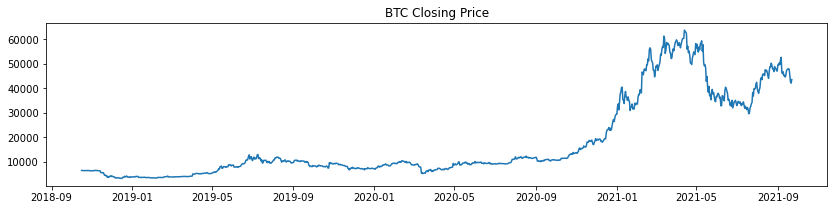

In [37]:
plt.figure(figsize=(14,3))
plt.plot(btc_df['Close'],label = 'CLOSING PRICE')
plt.title('BTC Closing Price')
plt.savefig(r'plots\btc_lineplot.png')

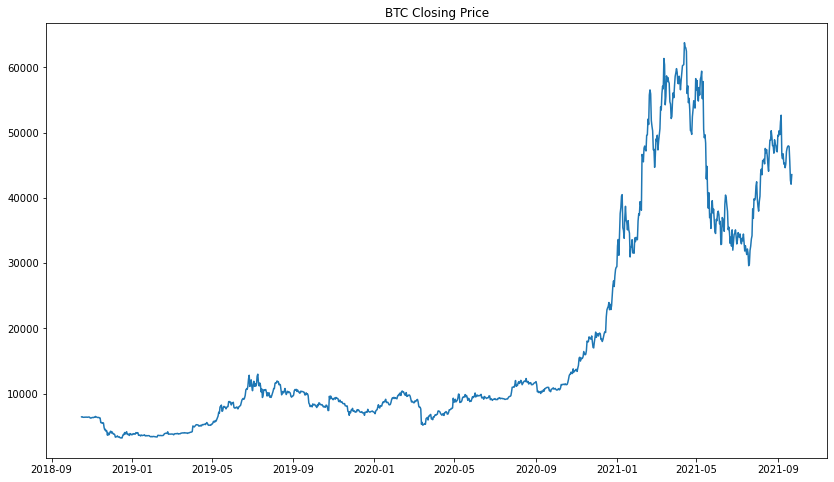

In [161]:
plt.figure(figsize=(14,8))
plt.plot(btc_df['Close'],lege)
plt.title('BTC Closing Price')
plt.savefig(r'plots\btc_lineplot.png')

In [174]:
fig, ax = plt.subplot(3,1,figsize=(14,21))
for count,ele in enumerate([btc_df,eth_df,]):
    ax[i].plot()

NameError: name 'figsize' is not defined

In [167]:
btc_df['Close'].sort_values()

Date
2018-12-16 04:00:00     3202.08
2018-12-14 04:00:00     3219.68
2018-12-15 04:00:00     3235.63
2018-12-13 04:00:00     3250.01
2018-12-06 04:00:00     3333.02
                         ...   
2021-03-13 04:00:00    61354.75
2021-04-16 04:00:00    62450.00
2021-04-15 04:00:00    62998.68
2021-04-14 04:00:00    63063.72
2021-04-13 04:00:00    63773.18
Name: Close, Length: 1073, dtype: float64

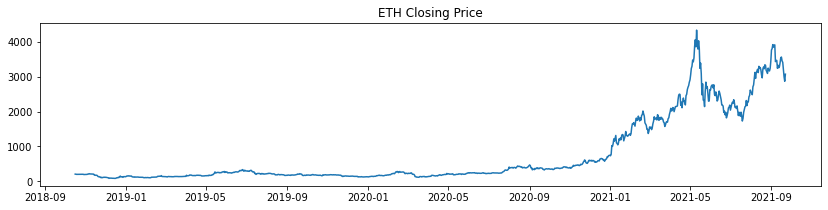

In [38]:
plt.figure(figsize=(14,3))
plt.plot(eth_df['Close'],label = 'CLOSING PRICE')
plt.title('ETH Closing Price')
plt.savefig(r'plots\eth_lineplot.png')

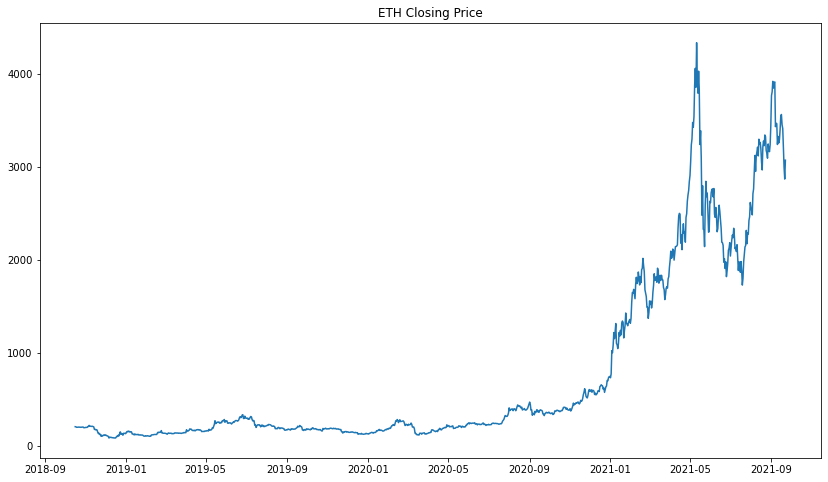

In [162]:
plt.figure(figsize=(14,8))
plt.plot(eth_df['Close'])
plt.title('ETH Closing Price')
plt.savefig(r'plots\eth_lineplot.png')

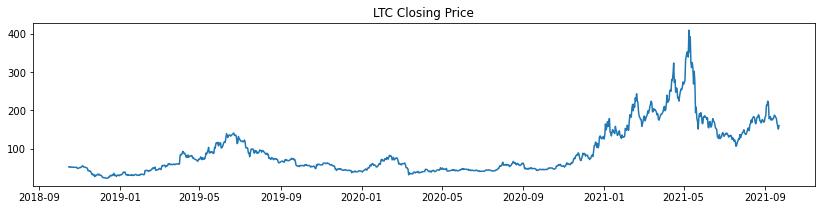

In [39]:
plt.figure(figsize=(14,3))
plt.plot(ltc_df['Close'],label = 'CLOSING PRICE')
plt.title('LTC Closing Price')
plt.savefig(r'plots\ltc_lineplot.png')

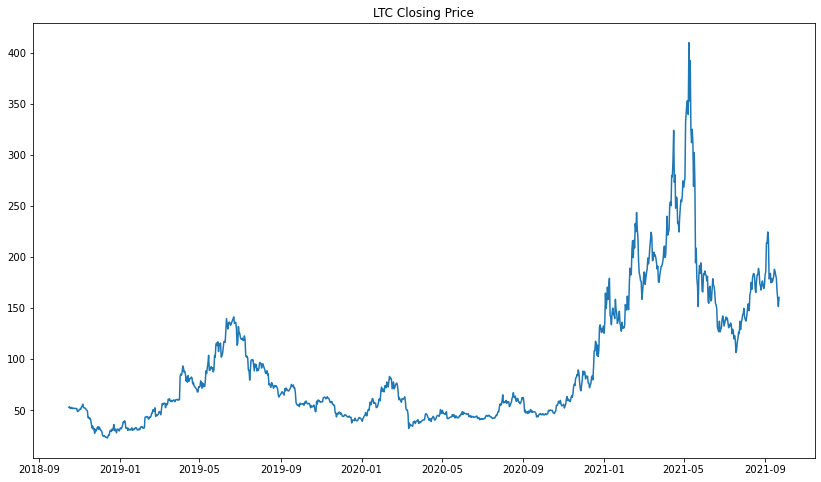

In [163]:
plt.figure(figsize=(14,8))
plt.plot(ltc_df['Close'])
plt.title('LTC Closing Price')
plt.savefig(r'plots\ltc_lineplot.png')

In [198]:
def removeTrendSeasonality(timeseries,title):
    
    ## Differencing Technique
    if(any(n<=0 for n in timeseries)):
        ts_log = timeseries
        ts_log_diff = timeseries.diff()
        dataTransformFlag=1
    else:
        ts_log = np.log(timeseries)
        ts_log_diff = ts_log - ts_log.shift()

        
        dataTransformFlag=2
        

    # Treating nan values due to shift
    ts_log_diff.dropna(inplace=True)
    pred_df['log'] = ts_log
    pred_df['log_diff'] = ts_log_diff
    
    
    
    # Stationarity test

    testStationarity(ts_log_diff,title)
    
    ### Decomposition technique
    from statsmodels.tsa.seasonal import seasonal_decompose
    decomposition = seasonal_decompose(ts_log,model='multiplicative',freq=288)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    plt.figure(figsize=(15,10))
    plt.subplot(411)
    plt.subplot(411).set_title(title)
    plt.plot(ts_log, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.title(title)
    plt.tight_layout()
    
    return ts_log_diff,dataTransformFlag



In [199]:
def testStationarity(timeseries, title):
    
    # List containing report details    
    stationarity = False
    report_text1 = []
    dataTransformFlag = 0

    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).mean()

    
    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')

    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.clf()
    
    # Printing Title
    print(title)
    
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')

    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
        index=['Test Statistic', 'p-value', '#Lags Used',
                                 'Number of Observations Used'])
    Pvalue = dfoutput['p-value']
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

    report_text1.append(str(dfoutput))
    
    if(Pvalue>0.05):
        print('P-value>0.05, therefore Series is not stationary',end = '\n')
        print('Data is being transformed to remove trend and seasonality')
        
        modifiedDataseries,dataTransformFlag = removeTrendSeasonality(timeseries,title)
        stationarity = True    
        return modifiedDataseries, dataTransformFlag,stationarity

    else:
        print('P-value<0.05, therefore Series is stationary',end = '\n')          
        return timeseries, dataTransformFlag,stationarity


Ethereum
Results of Dickey-Fuller Test:
Test Statistic                    0.759883
p-value                           0.990960
#Lags Used                       20.000000
Number of Observations Used    1052.000000
Critical Value (1%)              -3.436581
Critical Value (5%)              -2.864291
Critical Value (10%)             -2.568235
dtype: float64
P-value>0.05, therefore Series is not stationary
Data is being transformed to remove trend and seasonality
<class 'pandas.core.series.Series'>
Ethereum
Results of Dickey-Fuller Test:
Test Statistic                -9.745159e+00
p-value                        8.293430e-17
#Lags Used                     9.000000e+00
Number of Observations Used    1.062000e+03
Critical Value (1%)           -3.436522e+00
Critical Value (5%)           -2.864265e+00
Critical Value (10%)          -2.568221e+00
dtype: float64
P-value<0.05, therefore Series is stationary


(Date
 2018-10-17 04:00:00   -0.006139
 2018-10-18 04:00:00   -0.025594
 2018-10-19 04:00:00    0.000000
 2018-10-20 04:00:00    0.006497
 2018-10-21 04:00:00    0.004722
                          ...   
 2021-09-18 04:00:00   -0.011414
 2021-09-19 04:00:00   -0.068389
 2021-09-20 04:00:00   -0.061214
 2021-09-21 04:00:00   -0.043971
 2021-09-22 04:00:00    0.068400
 Name: Close, Length: 1072, dtype: float64,
 2,
 True)

<Figure size 432x288 with 0 Axes>

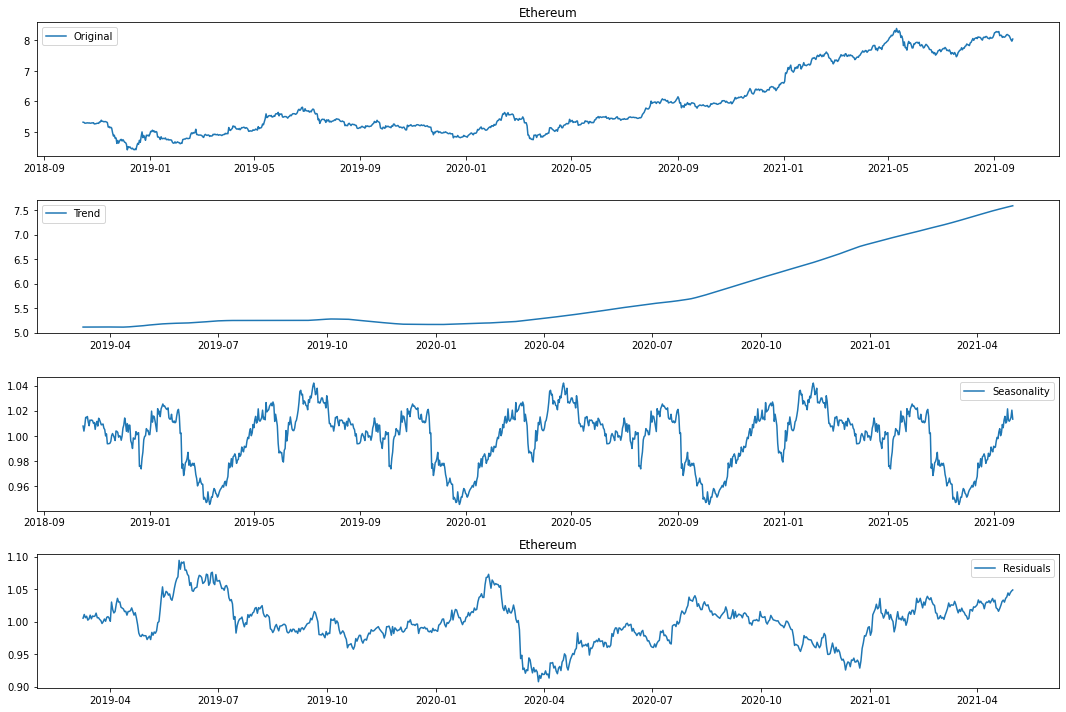

In [201]:
testStationarity(eth_df['Close'],'Ethereum')

Litecoin
Results of Dickey-Fuller Test:
Test Statistic                   -1.290931
p-value                           0.633311
#Lags Used                       22.000000
Number of Observations Used    1050.000000
Critical Value (1%)              -3.436593
Critical Value (5%)              -2.864297
Critical Value (10%)             -2.568238
dtype: float64
P-value>0.05, therefore Series is not stationary
Data is being transformed to remove trend and seasonality
<class 'pandas.core.series.Series'>
Litecoin
Results of Dickey-Fuller Test:
Test Statistic                  -36.308402
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1071.000000
Critical Value (1%)              -3.436470
Critical Value (5%)              -2.864242
Critical Value (10%)             -2.568209
dtype: float64
P-value<0.05, therefore Series is stationary


(Date
 2018-10-17 04:00:00    0.011274
 2018-10-18 04:00:00   -0.031122
 2018-10-19 04:00:00    0.000000
 2018-10-20 04:00:00    0.016630
 2018-10-21 04:00:00   -0.012591
                          ...   
 2021-09-18 04:00:00   -0.014605
 2021-09-19 04:00:00   -0.071787
 2021-09-20 04:00:00   -0.046198
 2021-09-21 04:00:00   -0.051402
 2021-09-22 04:00:00    0.057092
 Name: Close, Length: 1072, dtype: float64,
 2,
 True)

<Figure size 432x288 with 0 Axes>

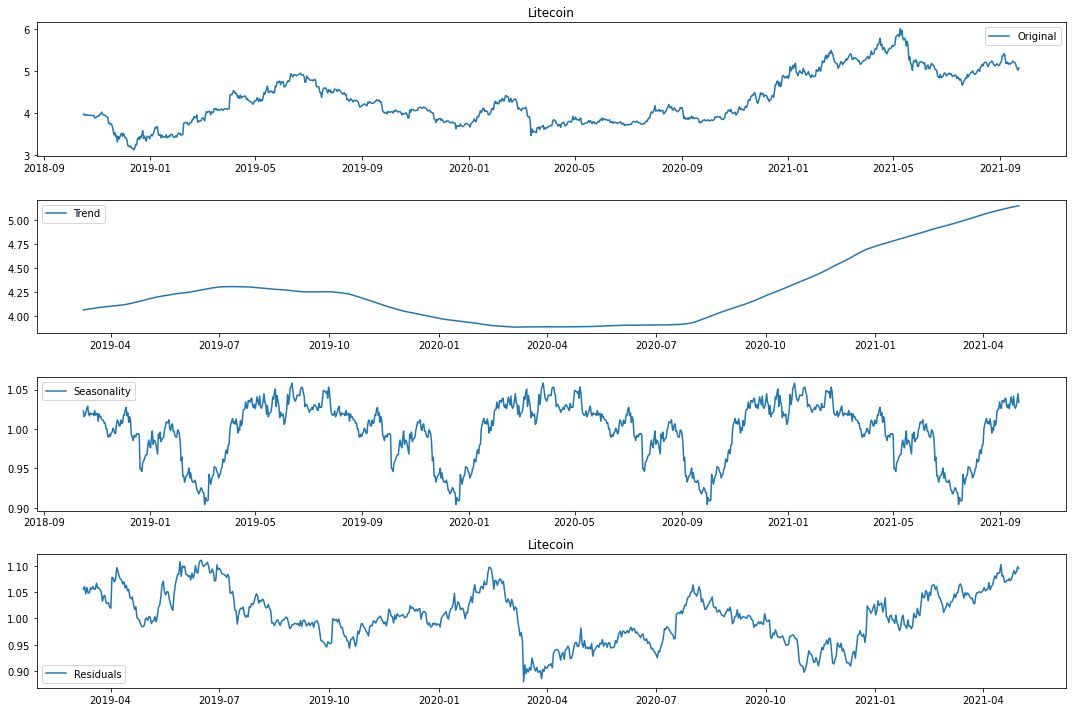

In [203]:
testStationarity(ltc_df['Close'],'Litecoin')

Bitcoin
Results of Dickey-Fuller Test:
Test Statistic                   -0.490324
p-value                           0.893891
#Lags Used                       20.000000
Number of Observations Used    1052.000000
Critical Value (1%)              -3.436581
Critical Value (5%)              -2.864291
Critical Value (10%)             -2.568235
dtype: float64
P-value>0.05, therefore Series is not stationary
Data is being transformed to remove trend and seasonality
<class 'pandas.core.series.Series'>
Bitcoin
Results of Dickey-Fuller Test:
Test Statistic                  -35.985687
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1071.000000
Critical Value (1%)              -3.436470
Critical Value (5%)              -2.864242
Critical Value (10%)             -2.568209
dtype: float64
P-value<0.05, therefore Series is stationary


(Date
 2018-10-17 04:00:00    0.002353
 2018-10-18 04:00:00   -0.011815
 2018-10-19 04:00:00    0.000000
 2018-10-20 04:00:00   -0.000212
 2018-10-21 04:00:00    0.004169
                          ...   
 2021-09-18 04:00:00   -0.002266
 2021-09-19 04:00:00   -0.049269
 2021-09-20 04:00:00   -0.064972
 2021-09-21 04:00:00   -0.014111
 2021-09-22 04:00:00    0.034322
 Name: Close, Length: 1072, dtype: float64,
 2,
 True)

<Figure size 432x288 with 0 Axes>

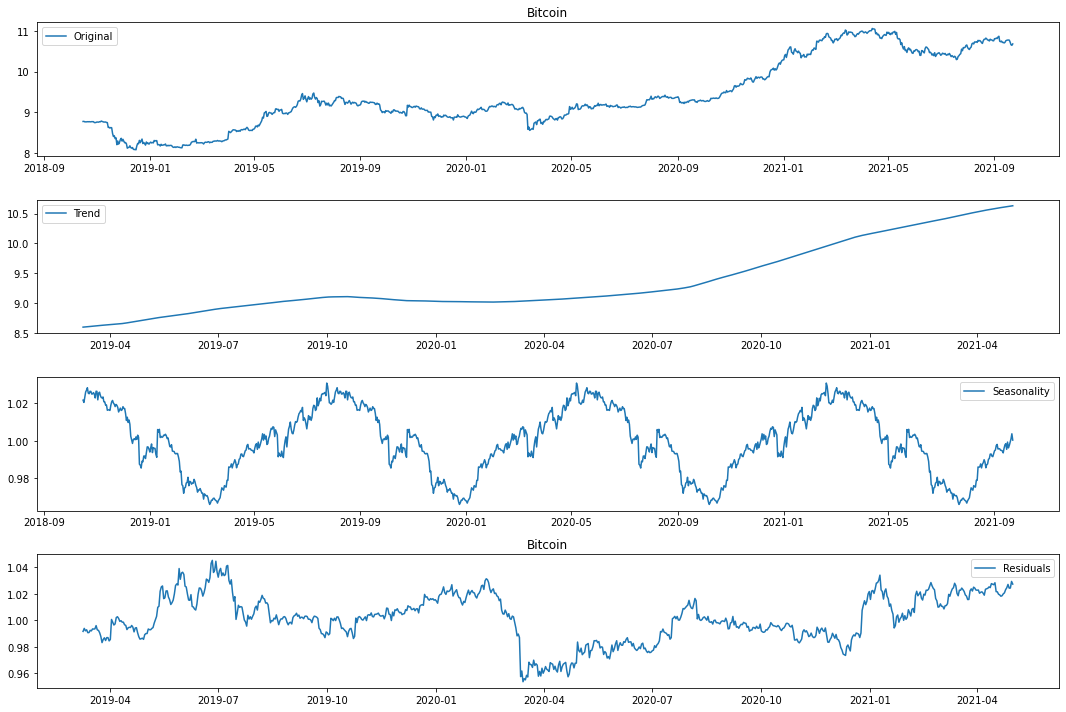

In [202]:
testStationarity(btc_df['Close'],'Bitcoin')

In [5]:
def plotAcfPacf(timeseries):

    if(any(n<=0 for n in timeseries)):
        ts_log = timeseries
        ts_log_diff = timeseries.diff()
        dataTransformFlag=1
    else:
        ts_log = np.log(timeseries)
        ts_log_diff = ts_log - ts_log.shift()
        dataTransformFlag=2

    ts_log_diff.dropna(inplace=True)
    lag_acf = acf(ts_log_diff, nlags=20)
    lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

    # Plot ACF
    #Plot ACF: 
    plt.subplot(121) 
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
    plt.title('Autocorrelation Function')


    #Plot PACF:
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.tight_layout()

    #plt.savefig('/home/sai/TCL/ACF_PACF/'+Series.name+'_'+'ACF_PACF'+'_'+'.png')
    #plt.clf()

C:\Users\saija\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


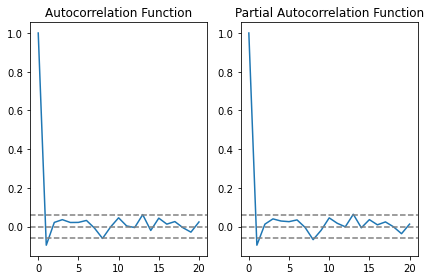

In [41]:
plotAcfPacf(btc_df['Close'])

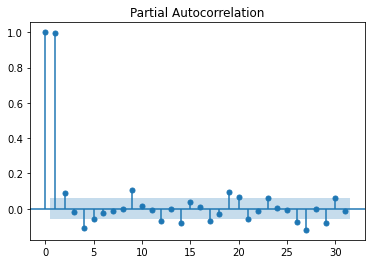

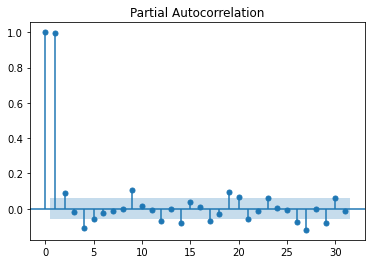

In [6]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_pacf(btc_df['Close'])

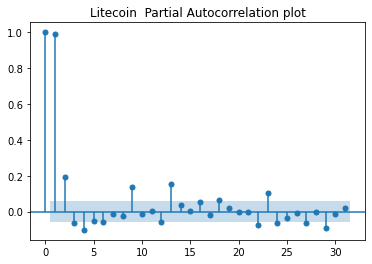

In [7]:
plot_pacf(ltc_df['Close'],title = 'Litecoin  Partial Autocorrelation plot')
plt.savefig(r'plots\ltc_pacf')

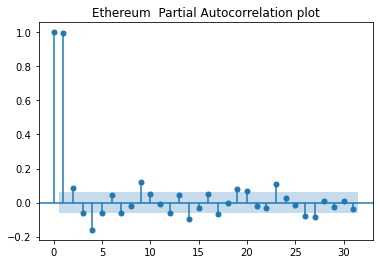

In [8]:
plot_pacf(eth_df['Close'],title = 'Ethereum  Partial Autocorrelation plot')
plt.savefig(r'plots\eth_pacf')

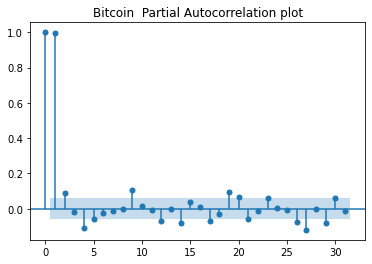

In [9]:
plot_pacf(btc_df['Close'],title = 'Bitcoin  Partial Autocorrelation plot')
plt.savefig(r'plots\btc_pacf')

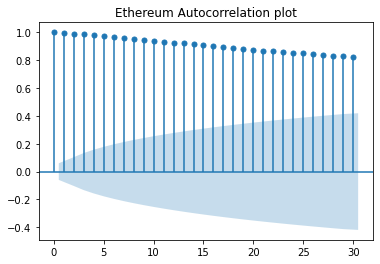

In [191]:
plot_acf(eth_df['Close'],lags=30,title = 'Ethereum Autocorrelation plot')
plt.savefig('plots\eth_acf')

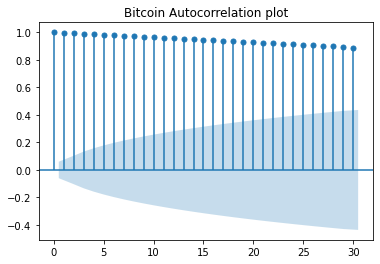

In [189]:
plot_acf(btc_df['Close'],lags=30,title = 'Bitcoin Autocorrelation plot')
plt.savefig(r'plots\btc_acf')

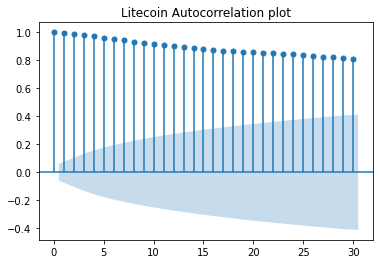

In [192]:
plot_acf(ltc_df['Close'],lags=30,title = 'Litecoin Autocorrelation plot')
plt.savefig(r'plots\ltc_acf')

In [10]:
def BackTransformSeries(timeSeries,forecast,DataTransferflag):
    transformedTimeSeries = list()
    if(DataTransferflag==0):
        transformedTimeSeries = forecast
    
    elif (DataTransferflag==1):
        for i in range(len(forecast)):
            if i==0:
                yt=timeSeries[-1]
                transformedTimeSeries.append(yt+forecast[i])
            else:
                yt = transformedTimeSeries[i-1]
                transformedTimeSeries.append(yt+forecast[i])
    elif (DataTransferflag==2):
        predictions_diff_log = pd.Series(forecast, copy=True)
        for i in range(len(forecast)):
            if i==0:
                yt=timeSeries[-1]
                transformedTimeSeries.append(yt*np.exp(predictions_diff_log[i]))
            else:
                yt = transformedTimeSeries[i-1]
                transformedTimeSeries.append(yt*np.exp(predictions_diff_log[i]))
    return transformedTimeSeries


In [11]:
from statsmodels.tsa.arima.model import ARIMA

In [12]:
from statsmodels.tsa.arima.model import ARIMA

pred_df = pd.DataFrame()

def evaluateArimaModel(dataset,validDataset, order,stationarity,datatransform):
    train_size = int(len(dataset))
    train, test = dataset[0:train_size], validDataset


    predictions = list()
    nmbr_steps = len(test)

    model =ARIMA(dataset,order=order)
    model_fit= model.fit()
    predictions = model_fit.forecast(steps=nmbr_steps,exog=None,alpha=0.05)
    pred_df['before'] = predictions
    if stationarity == True:
        predictions = BackTransformSeries(train,predictions,datatransform)
    pred_df['after'] = predictions
    pred_df['test'] = test
    error = mean_squared_error(test, predictions,squared=False)
    r2score = r2_score(test, predictions)
    print(r2score)
    return error,r2score

In [13]:
# def bestOrder(dataset , valid,stationarity,datatransform):
#     best_score= float("inf")
#     p_values = [0, 1, 2, 3, 4]
#     d_values = [0, 1, 2, 3]    
#     q_values = [0, 1, 2, 3]
#     # best_score= 100
#     best_cfg = None
#     for p in p_values:
# #     print(p)
#         for d in d_values:
# #         print(d)
#             for q in q_values:
# #             print(q)
#                 order = (p,d,q)
#                 #print(order)
#                 try:
#                     print('lol')
#                     mse = evaluateArimaModel(dataset,valid, order,stationarity,datatransform)
#                     print(mse)
#                     if mse < best_score:
#                         best_score, best_cfg = mse, order
#                 except:
                    
#                     continue
#     return best_score,best_cfg









def evaluateArimaModel(dataset,validDataset, order,stationarity,datatransform):
    train_size = int(len(dataset))
    train, test = dataset[0:train_size], validDataset


    predictions = list()
    nmbr_steps = len(test)

    model =ARIMA(dataset,order=order)
    model_fit= model.fit()
    predictions = model_fit.forecast(steps=nmbr_steps,exog=None,alpha=0.05)
    pred_df['before'] = predictions
    if stationarity == True:
        predictions = BackTransformSeries(train,predictions,datatransform)
    pred_df['after'] = predictions
    pred_df['test'] = test
    error = mean_squared_error(test, predictions,squared=False)
    r2score = r2_score(test, predictions)
    print(r2score)
    return error,r2score
def bestOrder(dataset , valid,stationarity,datatransform):
    best_score= float("inf")
    best_r2score = -10
    p_values = [i for i in range(20)]
    d_values = [0, 1, 2, 3]    
    q_values = [i for i in range(4)]
    best_cfg = None
    best_cfg_r2 = None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                mse,r2score = evaluateArimaModel(dataset,valid, order,stationarity,datatransform)
                if mse < best_score:
                    best_score, best_cfg = mse, order
                    
                if r2score > best_r2score:
                    best_r2score, best_cfg_r2 = r2score, order  
                    
    return best_score,best_cfg,r2score,best_cfg_r2

In [14]:
pred_df

""


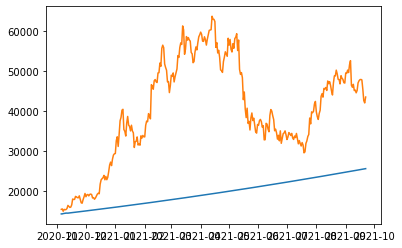

In [143]:
plt.plot(pred_df['before'])
plt.plot(pred_df['test'])

In [89]:
pred_df['before'].value_counts()

7999.343155    322
Name: before, dtype: int64

In [110]:
pred_df

,before,after,test,log,log_diff
2020-11-05 04:00:00,14282.917445,14282.917445,15463.93,9.646265,0.075730
2020-11-06 04:00:00,14316.194149,14316.194149,15579.19,9.653691,0.007426
2020-11-07 04:00:00,14368.894092,14368.894092,14989.00,9.615072,-0.038619
2020-11-08 04:00:00,14390.434646,14390.434646,15461.22,9.646090,0.031018
2020-11-09 04:00:00,14417.751999,14417.751999,15357.46,9.639357,-0.006734
...,...,...,...,...,...
2021-09-18 04:00:00,25413.416143,25413.416143,47854.23,10.775915,-0.002266
2021-09-19 04:00:00,25455.575423,25455.575423,45553.62,10.726645,-0.049269
2021-09-20 04:00:00,25497.731596,25497.731596,42688.03,10.661674,-0.064972
2021-09-21 04:00:00,25539.980170,25539.980170,42089.88,10.647563,-0.014111


In [111]:
model =ARIMA(btc_df['Close'][:751],order=(4,2,0))
#model_fit= model.fit(disp=0)
model_fit= model.fit()
predictions = model_fit.forecast(steps=len(btc_df['Close'][751:]),exog=None,alpha=0.05)

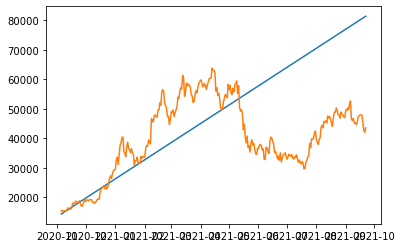

In [113]:
plt.plot(predictions)
plt.plot(pred_df['test'])

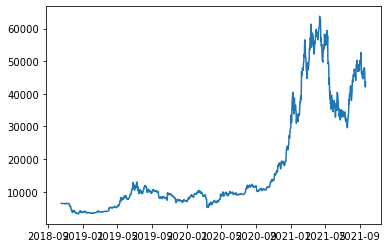

In [114]:
plt.plot(btc_df['Close'])

In [209]:
btc_df

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2018-10-16 04:00:00,1539662400000,BTCUSD,6423.27,6489.99,6390.10,6444.08,2978.589591
2018-10-17 04:00:00,1539748800000,BTCUSD,6444.08,6487.77,6406.98,6459.26,1998.462064
2018-10-18 04:00:00,1539835200000,BTCUSD,6459.26,6459.64,6350.92,6383.39,4597.200330
2018-10-19 04:00:00,1539921600000,BTCUSD,6383.39,6383.39,6383.39,6383.39,0.000000
2018-10-20 04:00:00,1540008000000,BTCUSD,6383.39,6386.34,6382.00,6382.04,2.701644
...,...,...,...,...,...,...,...
2021-09-18 04:00:00,1631937600000,BTCUSD,47962.79,48808.97,47613.93,47854.23,671.356150
2021-09-19 04:00:00,1632024000000,BTCUSD,47854.23,48333.32,45175.20,45553.62,860.712331
2021-09-20 04:00:00,1632110400000,BTCUSD,45553.62,45837.90,40137.98,42688.03,4373.379477


In [210]:
bestOrder(btc_df['Close'][:700],btc_df['Close'][700:887],True,0)

(6273.8301810200155, (1, 2, 0), -2.023020201202118, (1, 2, 0))

In [15]:
nmbr_steps = len(btc_df[887:])
model =ARIMA(btc_df['Close'][:887],order=(1,2,0))
#model_fit= model.fit(disp=0)
model_fit= model.fit()
predictions = model_fit.forecast(steps=nmbr_steps,exog=None,alpha=0.05)

error = mean_squared_error(btc_df['Close'][887:], predictions,squared=False)

print(error)

12047.047855564555


In [21]:
btc_df.iloc[887]

Unix Timestamp    1616299200000
Symbol                   BTCUSD
Open                   57833.32
High                   58164.58
Low                     55500.0
Close                  57551.47
Volume               781.348959
Name: 2021-03-21 04:00:00, dtype: object

In [23]:
nmbr_steps = len(btc_df[:887])
start_index = '2018-10-16 04:00:00'
end_index = '2021-03-20 04:00:00'
btc_train_predictions = model_fit.predict(start=start_index, end=end_index)

btc_train_error = mean_squared_error(btc_df['Close'][:887], btc_train_predictions,squared=False)
btc_train_error

978.9354223349693

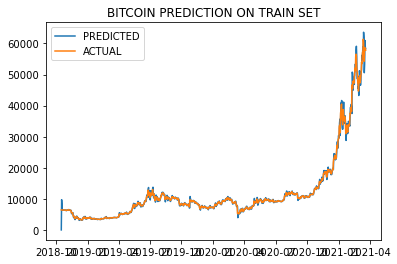

In [24]:
plt.plot(btc_train_predictions,label='PREDICTED')
plt.plot(btc_df['Close'][:887],label='ACTUAL')
plt.title('BITCOIN PREDICTION ON TRAIN SET')
plt.legend()

In [216]:
model_fit.arparams

array([-0.47454841])

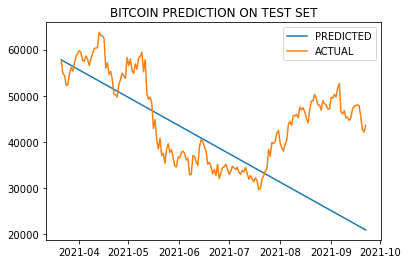

In [250]:
plt.plot(predictions,label='PREDICTED')
plt.plot(btc_df['Close'][887:],label='ACTUAL')
plt.title('BITCOIN PREDICTION ON TEST SET')
plt.legend()

# ETH

In [218]:
bestOrder(eth_df['Close'][:700],eth_df['Close'][700:887],True,0)

(415.6011115148802, (9, 3, 2), -2.595395577828105, (9, 3, 2))

In [25]:
nmbr_steps = len(btc_df[887:])
model =ARIMA(eth_df['Close'][:887],order=(9,3,2))
#model_fit= model.fit(disp=0)
model_fit= model.fit()
predictions = model_fit.forecast(steps=nmbr_steps,exog=None,alpha=0.05)

error = mean_squared_error(btc_df['Close'][887:], predictions,squared=False)

print(error)

44463.0873888173


In [26]:
nmbr_steps = len(btc_df[:887])
start_index = '2018-10-16 04:00:00'
end_index = '2021-03-20 04:00:00'
btc_train_predictions = model_fit.predict(start=start_index, end=end_index)

btc_train_error = mean_squared_error(eth_df['Close'][:887], btc_train_predictions,squared=False)
btc_train_error

30.057386436640318

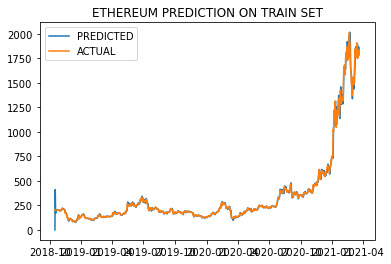

In [27]:
plt.plot(btc_train_predictions,label='PREDICTED')
plt.plot(eth_df['Close'][:887],label='ACTUAL')
plt.title('ETHEREUM PREDICTION ON TRAIN SET')
plt.legend()

In [230]:
error = mean_squared_error(eth_df['Close'][887:], predictions,squared=False)
error

2747.951761630702

In [232]:
model_fit.arparams

array([-0.73569244, -0.59263789, -0.49984834, -0.55751873, -0.41782846,
       -0.23398732, -0.31826475, -0.39651991, -0.29468663])

In [233]:
model_fit.maparams

array([-1.23429129,  0.23495745])

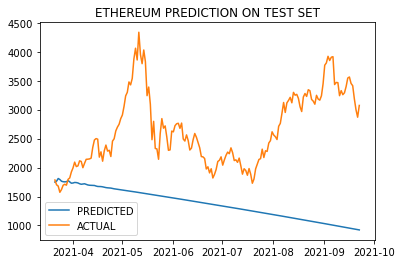

In [248]:
plt.plot(predictions,label='PREDICTED')
plt.plot(eth_df['Close'][887:],label='ACTUAL')
plt.title('ETHEREUM PREDICTION ON TEST SET')
plt.legend()

# LTC

In [223]:
bestOrder(ltc_df['Close'][:700],ltc_df['Close'][700:887],True,0)

(18.060688891378025, (7, 3, 0), -5.30859250184194, (7, 3, 0))

In [34]:
1073-887

186

In [28]:
nmbr_steps = len(ltc_df[887:])
model =ARIMA(ltc_df['Close'][:887],order=(7,3,0))
#model_fit= model.fit(disp=0)
model_fit= model.fit()
predictions = model_fit.forecast(steps=nmbr_steps,exog=None,alpha=0.05)

error = mean_squared_error(ltc_df['Close'][887:], predictions,squared=False)

print(error)

4346.1299173540265


In [30]:
nmbr_steps = len(btc_df[:887])
start_index = '2018-10-16 04:00:00'
end_index = '2021-03-20 04:00:00'
btc_train_predictions = model_fit.predict(start=start_index, end=end_index)

btc_train_error = mean_squared_error(ltc_df['Close'][:887], btc_train_predictions,squared=False)
btc_train_error

6.418721334928917

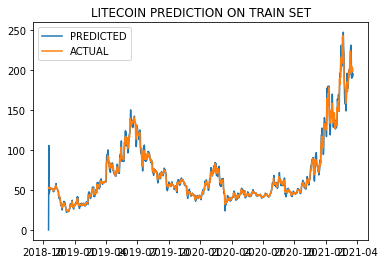

In [32]:
plt.plot(btc_train_predictions,label='PREDICTED')
plt.plot(ltc_df['Close'][:887],label='ACTUAL')
plt.title('LITECOIN PREDICTION ON TRAIN SET')
plt.legend()

In [244]:
model_fit.arparams

array([-1.66882258, -1.97173681, -1.90834724, -1.58549284, -1.10520442,
       -0.56005006, -0.15000784])

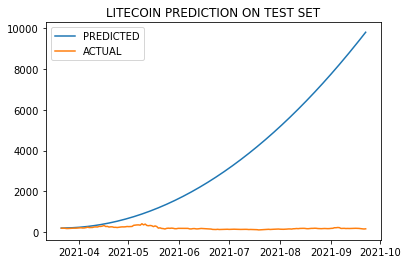

In [245]:
plt.plot(predictions,label='PREDICTED')
plt.plot(ltc_df['Close'][887:],label='ACTUAL')
plt.title('LITECOIN PREDICTION ON TEST SET')
plt.legend()